<a href="https://colab.research.google.com/github/IlhamThrq/AI_TI-1B_2025/blob/main/MuhammadIlhamRijalThaariq_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Tengah Semester Kecerdasan Buatan 2025

## 1. Import Library


In [11]:
# Import Library

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Visualisation
sns.set(style="whitegrid", palette="pastel")

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12



## 2. Load Dataset

In [12]:
# Load Dataset
df_airbnb = pd.read_csv('airbnb.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 3. Eksplorasi Data Awal

In [14]:
# Info kolom dan tipe data

df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 3.1 Jumlah Baris dan kolom

In [15]:
# Cek jumlah baris dan kolom

print("\nJumlah baris:", df_airbnb.shape[0])
print("Jumlah kolom:", df_airbnb.shape[1])


Jumlah baris: 48895
Jumlah kolom: 16


## 3.2 Statistik Deskriptif Awal

In [16]:
# Statistik deskriptif

df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
# Median (karena describe tidak menyertakan median)

df_airbnb.median(numeric_only=True)

,0
id,1.967728e+07
host_id,3.079382e+07
latitude,4.072307e+01
longitude,-7.395568e+01
price,1.060000e+02
minimum_nights,3.000000e+00
number_of_reviews,5.000000e+00
reviews_per_month,7.200000e-01
calculated_host_listings_count,1.000000e+00
availability_365,4.500000e+01


## 3.3 Cek missing Values

In [18]:
df_airbnb.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## 4. Data Cleaning & Manipulation

In [19]:
# Konversi kolom tanggal terlebih dahulu
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], errors='coerce')

# Hapus baris dengan nama listing kosong (jumlahnya hanya 16)
df_airbnb = df_airbnb.dropna(subset=['name'])

# Isi missing 'host_name' dengan 'Unknown'
df_airbnb['host_name'] = df_airbnb['host_name'].fillna('Unknown')

# Isi 'reviews_per_month' yang kosong dengan 0 (listing belum pernah direview)
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0)

<ipython-input-19-e2f0a4ec0c2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb['host_name'] = df_airbnb['host_name'].fillna('Unknown')
<ipython-input-19-e2f0a4ec0c2f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0)


## 4.1 Cek info data umum Dataset setelah Cleaning

In [20]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48879 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48879 non-null  int64         
 3   host_name                       48879 non-null  object        
 4   neighbourhood_group             48879 non-null  object        
 5   neighbourhood                   48879 non-null  object        
 6   latitude                        48879 non-null  float64       
 7   longitude                       48879 non-null  float64       
 8   room_type                       48879 non-null  object        
 9   price                           48879 non-null  int64         
 10  minimum_nights                  48879 non-null  int64         
 11  number_

## 4.2 Cek jumlah missing value per kolom setelah cleaning dan manipulation

In [21]:
print(df_airbnb.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


## 4.3 Cek kembali statistik deskriptifnya

In [24]:
print(df_airbnb.describe())

                 id       host_id      latitude     longitude         price  \
count  4.887900e+04  4.887900e+04  48879.000000  48879.000000  48879.000000   
mean   1.902062e+07  6.763013e+07     40.728945    -73.952168    152.722355   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.474248e+06  7.816856e+06     40.690090    -73.983070     69.000000   
50%    1.968643e+07  3.079133e+07     40.723080    -73.955680    106.000000   
75%    2.915334e+07  1.074344e+08     40.763110    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
std    1.098282e+07  7.862070e+07      0.054529      0.046160    240.186804   

       minimum_nights  number_of_reviews                    last_review  \
count    48879.000000       48879.000000                          38837   
mean         7.011027          23.281205  2018-10-04 05:08:31.584313856   
min          1.000000           0.000000            2011-03-28 

## 4.4 Cek kolom tanggal apakah sudah jadi Datetime

In [25]:
print(df_airbnb['last_review'].dtype)

datetime64[ns]


## 5. Visualisasi dan Analisis Data

## 5.1 Distribusi Harga

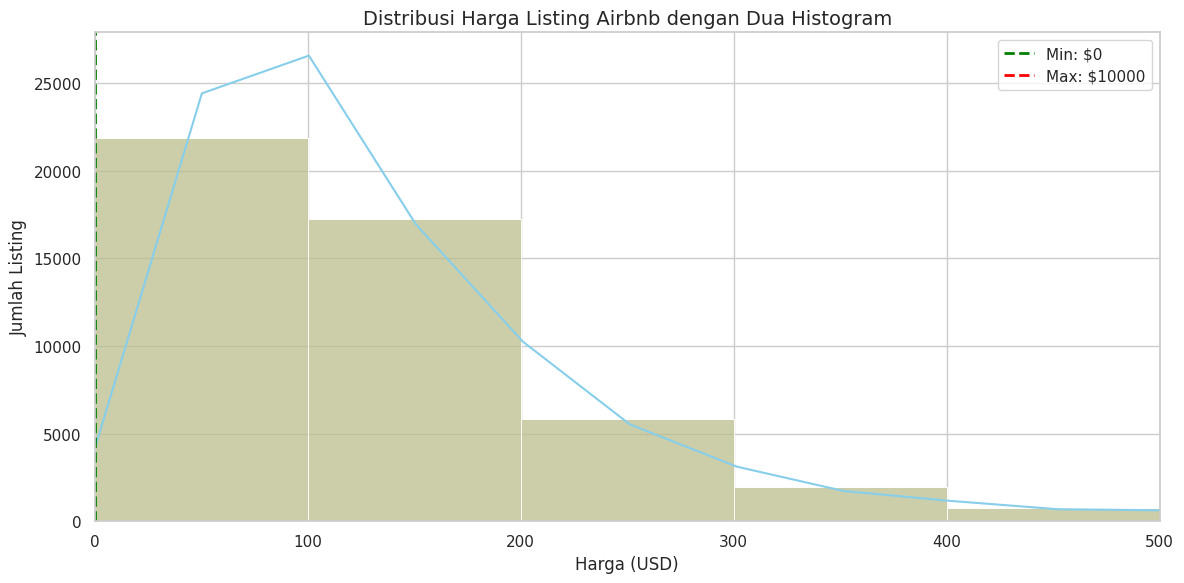

In [40]:
# Hitung harga minimum dan maksimum
min_price = df_airbnb['price'].min()
max_price = df_airbnb['price'].max()

sns.histplot(df_airbnb['price'], bins=100, kde=True, color='skyblue', alpha=0.6)
sns.histplot(df_airbnb['price'], bins=100, color='orange', kde=False, alpha=0.3)

# Tambahkan garis vertikal untuk harga minimum dan maksimum
plt.axvline(min_price, color='green', linestyle='--', linewidth=2, label=f'Min: ${min_price}')
plt.axvline(max_price, color='red', linestyle='--', linewidth=2, label=f'Max: ${max_price}')

# Batasi tampilan harga hingga $500
plt.xlim(0, 500)
plt.title("Distribusi Harga Listing Airbnb dengan Dua Histogram")
plt.xlabel("Harga (USD)")
plt.ylabel("Jumlah Listing")
plt.legend()
plt.tight_layout()
plt.show()


## 5.2 Distribusi Review per month

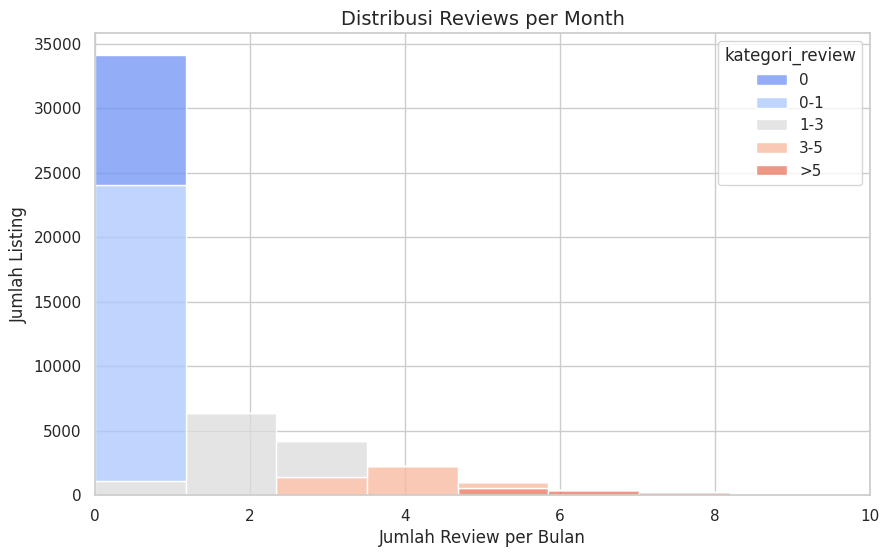

In [46]:
df_airbnb['kategori_review'] = pd.cut(df_airbnb['reviews_per_month'],
    bins=[-0.01, 0, 1, 3, 5, df_airbnb['reviews_per_month'].max()],
    labels=['0', '0-1', '1-3', '3-5', '>5'])
plt.figure(figsize=(10,6))
sns.histplot(data=df_airbnb, x='reviews_per_month', hue='kategori_review',
             bins=50, palette='coolwarm', multiple='stack')
plt.title("Distribusi Reviews per Month")
plt.xlabel("Jumlah Review per Bulan")
plt.ylabel("Jumlah Listing")
plt.xlim(0, 10)
plt.show()

## 5.3 Rata-rata harga per room_type

<ipython-input-48-f841e6a505e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


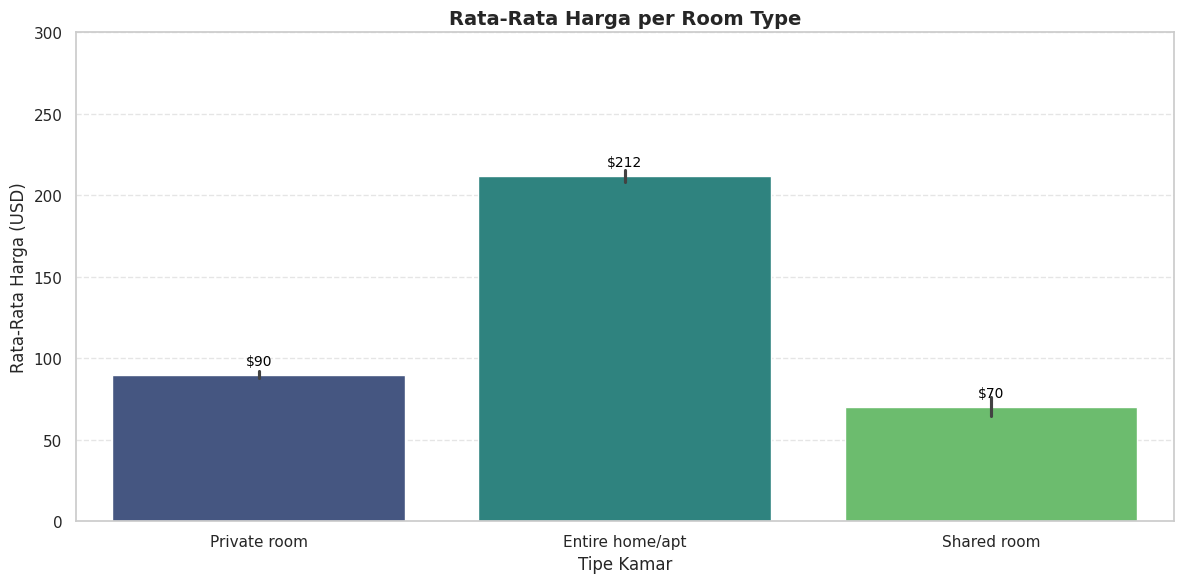

In [48]:
ax = sns.barplot(
    data=df_airbnb,
    x='room_type',
    y='price',
    estimator=np.mean,
    palette='viridis'
)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"${height:.0f}",
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Rata-Rata Harga per Room Type", fontsize=14, fontweight='bold')
plt.ylabel("Rata-Rata Harga (USD)")
plt.xlabel("Tipe Kamar")
plt.ylim(0, 300)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 5.4 Jumlah listing per neighbourhood group

<ipython-input-49-afbc9ca12dd4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


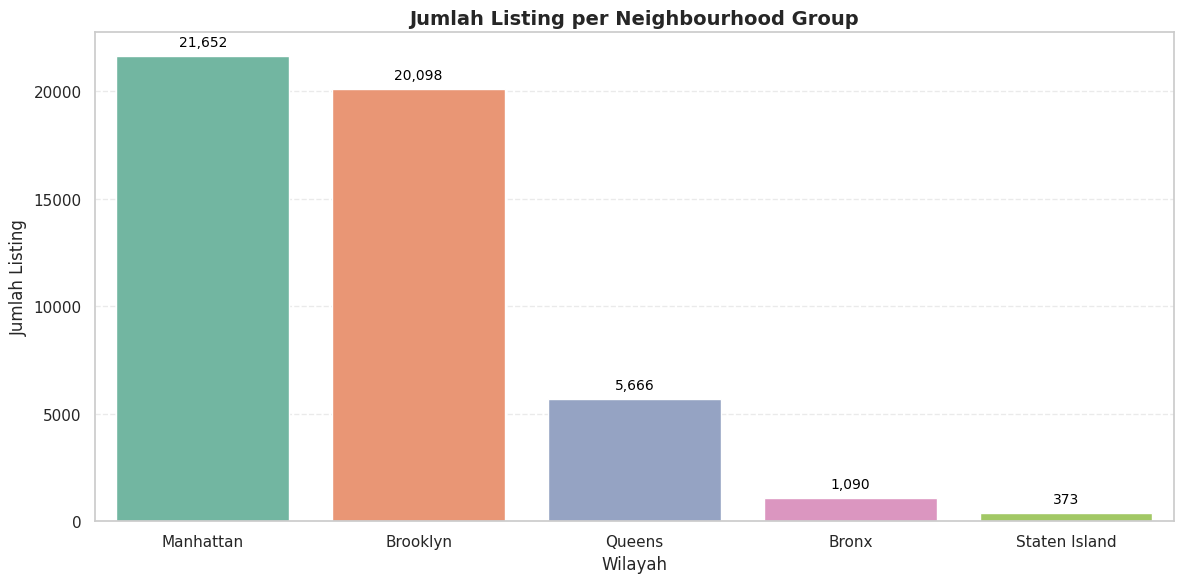

In [49]:
ax = sns.countplot(
    data=df_airbnb,
    x='neighbourhood_group',
    order=df_airbnb['neighbourhood_group'].value_counts().index,
    palette='Set2'
)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Jumlah Listing per Neighbourhood Group", fontsize=14, fontweight='bold')
plt.xlabel("Wilayah")
plt.ylabel("Jumlah Listing")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 5.5 Scatter Jumlah review vs harga

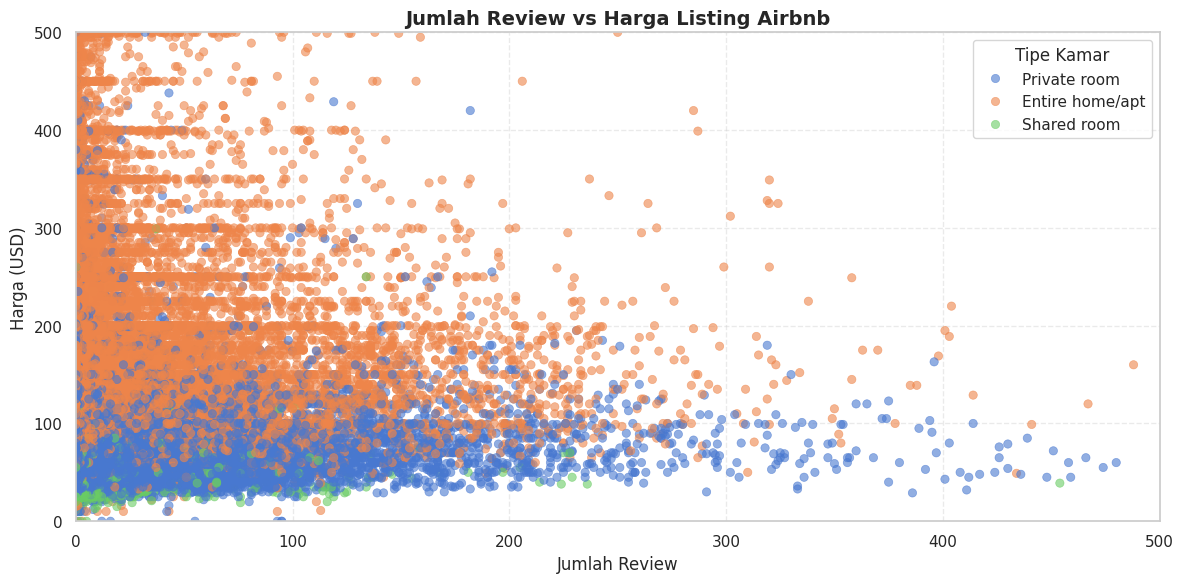

In [50]:
sns.scatterplot(
    data=df_airbnb,
    x='number_of_reviews',
    y='price',
    hue='room_type',
    palette='muted',
    alpha=0.6,
    edgecolor=None
)

plt.ylim(0, 500)
plt.xlim(0, 500)

plt.title("Jumlah Review vs Harga Listing Airbnb", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Review")
plt.ylabel("Harga (USD)")
plt.legend(title="Tipe Kamar", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 5.6 Peta Persebarang Listing

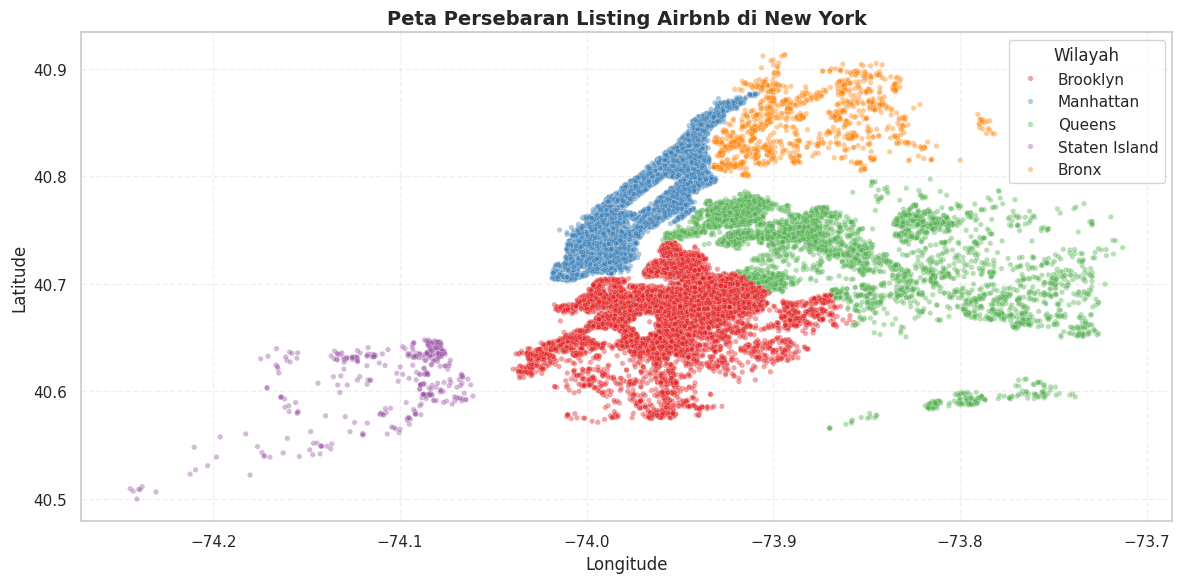

In [51]:
sns.scatterplot(
    data=df_airbnb,
    x='longitude',
    y='latitude',
    hue='neighbourhood_group',
    alpha=0.4,
    s=15,  # Ukuran titik lebih besar
    palette='Set1'
)

plt.title("Peta Persebaran Listing Airbnb di New York", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Wilayah', loc='upper right', frameon=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## 5.7 Rata-rata harga per kombinasi lokasi dan tipe kamar

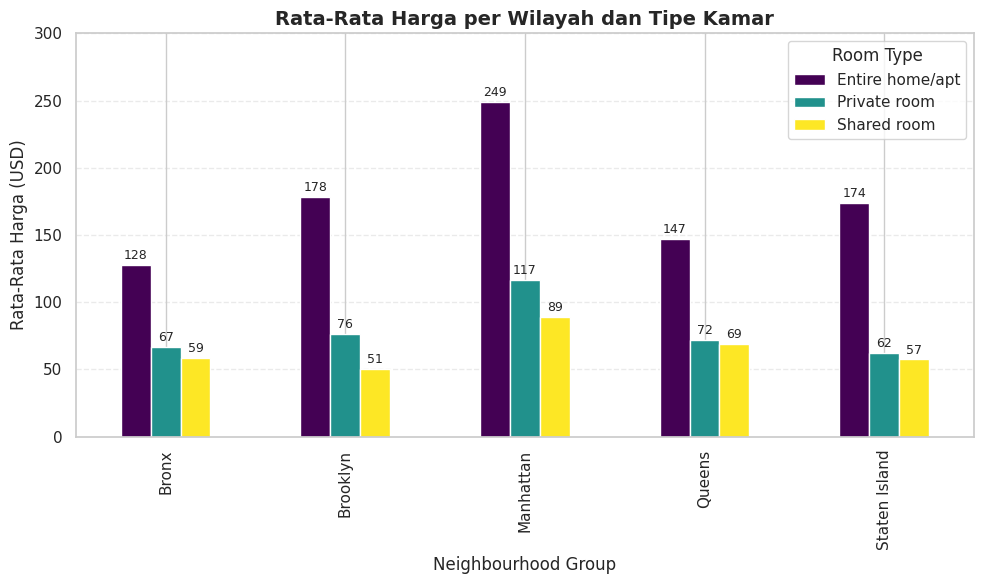

In [57]:
grouped_stats = df_airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()
ax = grouped_stats.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title("Rata-Rata Harga per Wilayah dan Tipe Kamar", fontsize=14, fontweight='bold')
plt.ylabel("Rata-Rata Harga (USD)")
plt.xlabel("Neighbourhood Group")
plt.ylim(0, 300)
plt.legend(title="Room Type")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()

## 5.8 Boxplot Harga per Wilayah

<ipython-input-58-01887da37c34>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


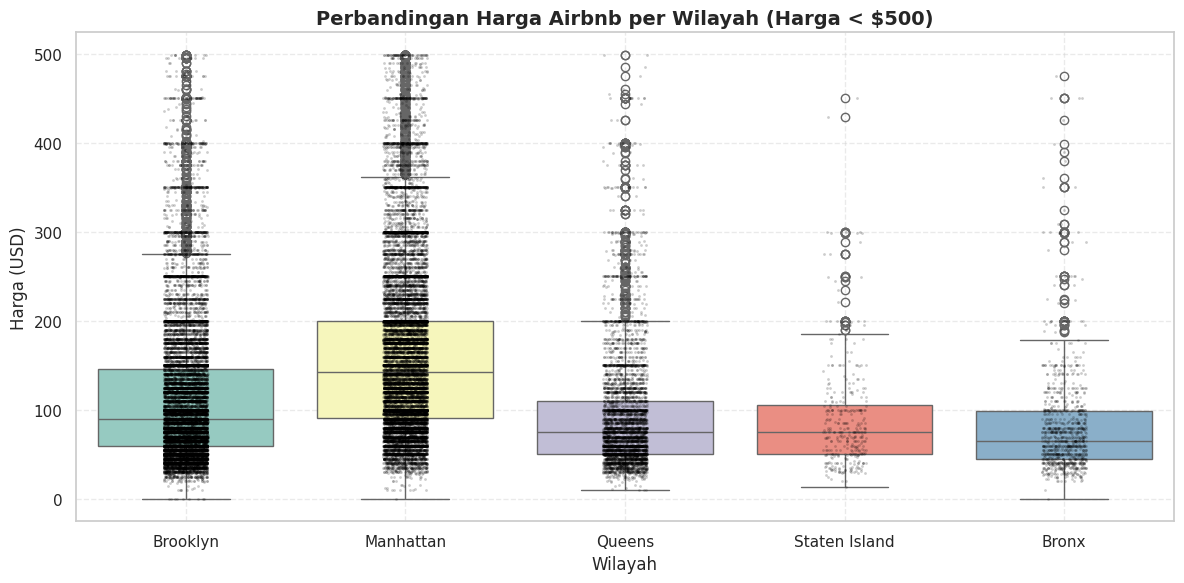

In [58]:
sns.boxplot(
    data=df_airbnb[df_airbnb['price'] < 500],
    x='neighbourhood_group',
    y='price',
    palette='Set3'
)

sns.stripplot(
    data=df_airbnb[df_airbnb['price'] < 500],
    x='neighbourhood_group',
    y='price',
    color='black',
    size=2,
    alpha=0.2,
    jitter=True
)

plt.title("Perbandingan Harga Airbnb per Wilayah (Harga < $500)", fontsize=14, fontweight='bold')
plt.xlabel("Wilayah")
plt.ylabel("Harga (USD)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 5.9 TOP 10 Neighbourhood Paling Banyak Listing

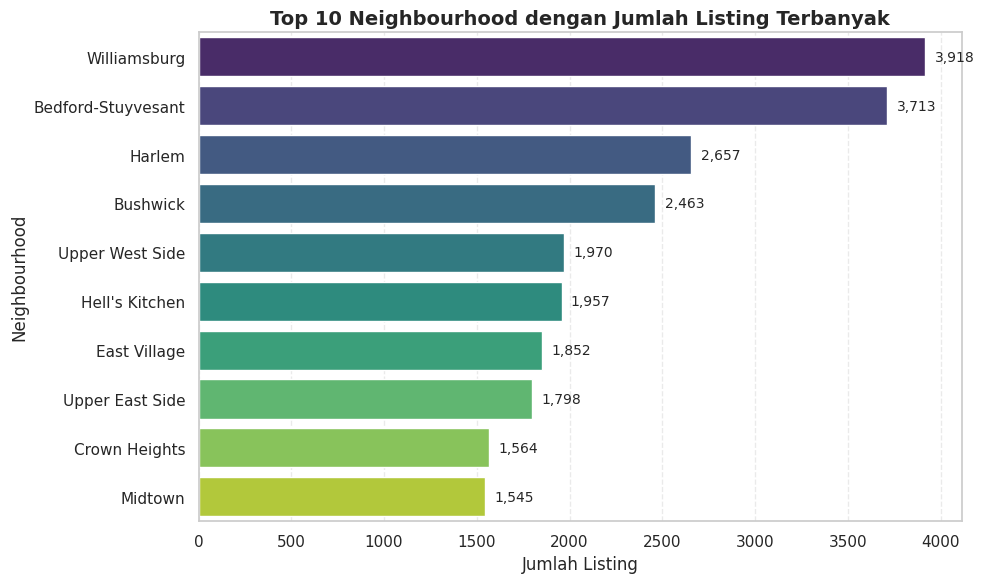

In [56]:
# Hitung jumlah listing per neighbourhood (Top 10)
top_neighbourhoods = df_airbnb['neighbourhood'].value_counts().head(10).reset_index()
top_neighbourhoods.columns = ['neighbourhood', 'count']

# Visualisasi horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_neighbourhoods,
    x='count',
    y='neighbourhood',
    palette='viridis',
    hue='neighbourhood',
    dodge=False,
    legend=False
)

# Tambahkan anotasi jumlah listing di ujung bar
for i, row in top_neighbourhoods.iterrows():
    ax.text(row['count'] + 50, i, f"{row['count']:,}", va='center', fontsize=10)

# Judul dan label
plt.title("Top 10 Neighbourhood dengan Jumlah Listing Terbanyak", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Listing")
plt.ylabel("Neighbourhood")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 5.10 Heatmap Korelasi

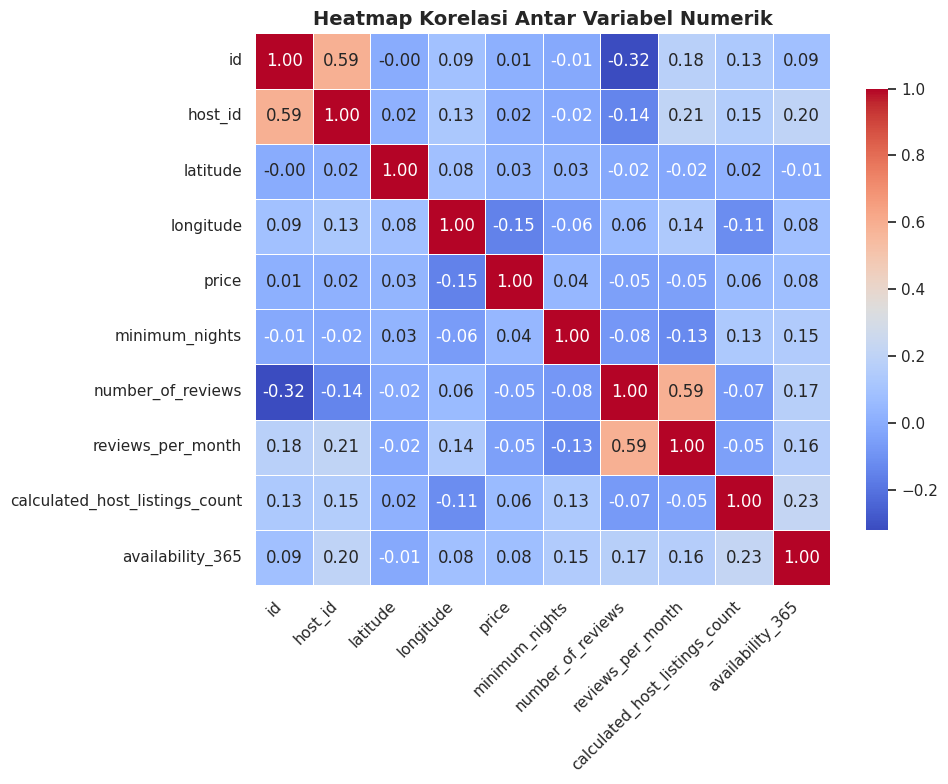

In [59]:
num_cols = df_airbnb.select_dtypes(include='number')
corr = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8}
)

plt.title("Heatmap Korelasi Antar Variabel Numerik", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 5.11 Distribusi Minimum Nights


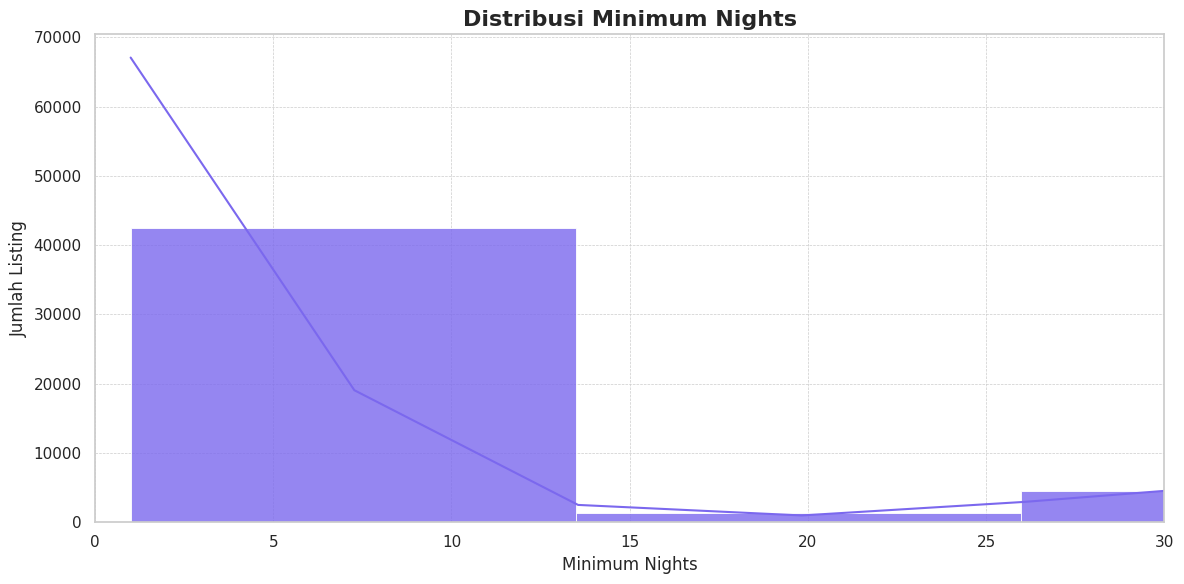

In [60]:
sns.histplot(
    df_airbnb['minimum_nights'],
    bins=100,
    kde=True,
    color='mediumslateblue',
    edgecolor='white',
    alpha=0.8
)

plt.xlim(0, 30)
plt.title("Distribusi Minimum Nights", fontsize=16, weight='bold')
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Jumlah Listing", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
